<center><h1> TensorFlow 基础：逻辑回归</h1></center>

# 加载MNIST数据

In [1]:
import keras
(X0, Y0), (X1, Y1) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


# 手写数字展示

<Figure size 432x288 with 0 Axes>

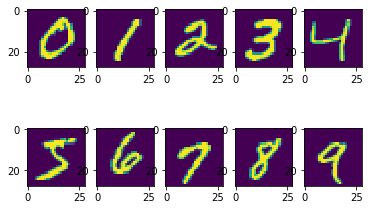

In [2]:
from matplotlib import pyplot as plt   #导入绘图库
plt.figure()                          #设置画布
fig,ax = plt.subplots(2,5)         #以俩行五列呈现
ax=ax.flatten()                   #返回一个一维数组
for i in range(10):            #循环打印出10张数字图片
    Im=X0[Y0==i][0]
    ax[i].imshow(Im)
plt.show()

# 产生One-Hot型因变量

In [3]:
from keras.utils import to_categorical 
YY0=to_categorical(Y0)   #将类别向量转换为二进制
YY1=to_categorical(Y1)
YY1

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# 逻辑回归模型

In [4]:
from keras.layers import Activation, Dense, Flatten, Input
from keras import Model

input_shape=(28,28)     
input_layer=Input(input_shape) #输入数组
x=input_layer
x=Flatten()(x)       # 返回一个一维数组
x=Dense(10)(x)      # 全连接层，实现对神经网络里的神经元激活。
x=Activation('softmax')(x)   #激活函数
output_layer=x           #输出颜值
model=Model(input_layer,output_layer) #模型的构建

# 理解模型结构

In [5]:
model.summary()   #描述模型的统计变量

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# 确定施工（优化）方案

In [6]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(0.01),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])     
#设置学习速率为0.01；极大似然估计；计算精度。

# 模型拟合结果

In [7]:
model.fit(X0,YY0,                             ##模型实现          
          validation_data=(X1,YY1),
          batch_size=1000,                             
          epochs=10)  #求得训练集X的均值，方差，最大值，最小值，这些训练集X固有的属性

Epoch 1/10
60/60 [==============================] - 0s 7ms/step - loss: 32.3851 - accuracy: 0.8056 - val_loss: 10.5011 - val_accuracy: 0.9026
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 8.6400 - accuracy: 0.8965 - val_loss: 7.2331 - val_accuracy: 0.8940
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 6.1547 - accuracy: 0.8939 - val_loss: 6.5577 - val_accuracy: 0.8805
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 5.3539 - accuracy: 0.8886 - val_loss: 6.0638 - val_accuracy: 0.8908
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 5.8119 - accuracy: 0.8840 - val_loss: 6.6473 - val_accuracy: 0.8901
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 5.0968 - accuracy: 0.8942 - val_loss: 5.3812 - val_accuracy: 0.9037
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 4.9859 - accuracy: 0.8907 - val_loss: 6.2444 - val_accuracy: 0.8791
Epoch 8/10
60/60 [

# 参数估计结果

In [8]:
model.layers[2].get_weights()[0].shape    #模型估计大小

(784, 10)

# 参数估计结果可视化

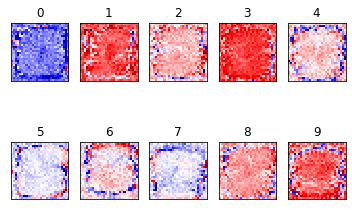

In [9]:
fig,ax = plt.subplots(2,5)       #以俩行五列呈现
ax=ax.flatten()                  #返回一个展平的数组
weights = model.layers[2].get_weights()[0]
for i in range(10):
    Im=weights[:,i].reshape((28,28))  #灰度矩阵
    ax[i].imshow(Im,cmap='seismic')   
    ax[i].set_title("{}".format(i))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

改进意见

1、可以增加训练集，并提前将照片处理好，避免歪歪斜斜的情况。

2、可以采用集成学习来优化，以提高精度。

3、采用多种形式采取特征，以不同的描述值来规范化数据。

# 课后思考：其他类似的多分类问题

- 识别豪车

X为：车高，车长，车牌号，车标志，尾部或侧身的数字，外型等

Y为：豪车等级

- 电子商务零售机器人识别服装

X为：服装类型，颜色，型号，款式，价格等

Y为：是否为顾客所需的服装

- 齿轮故障识别

X为：齿轮的状态，颜色，含油量，齿面损伤程度，振幅等

Y为：齿轮发生故障的等级